<a href="https://colab.research.google.com/github/rajeshmore1/Capstone-Project-3/blob/main/Rajesh_More_Team2_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


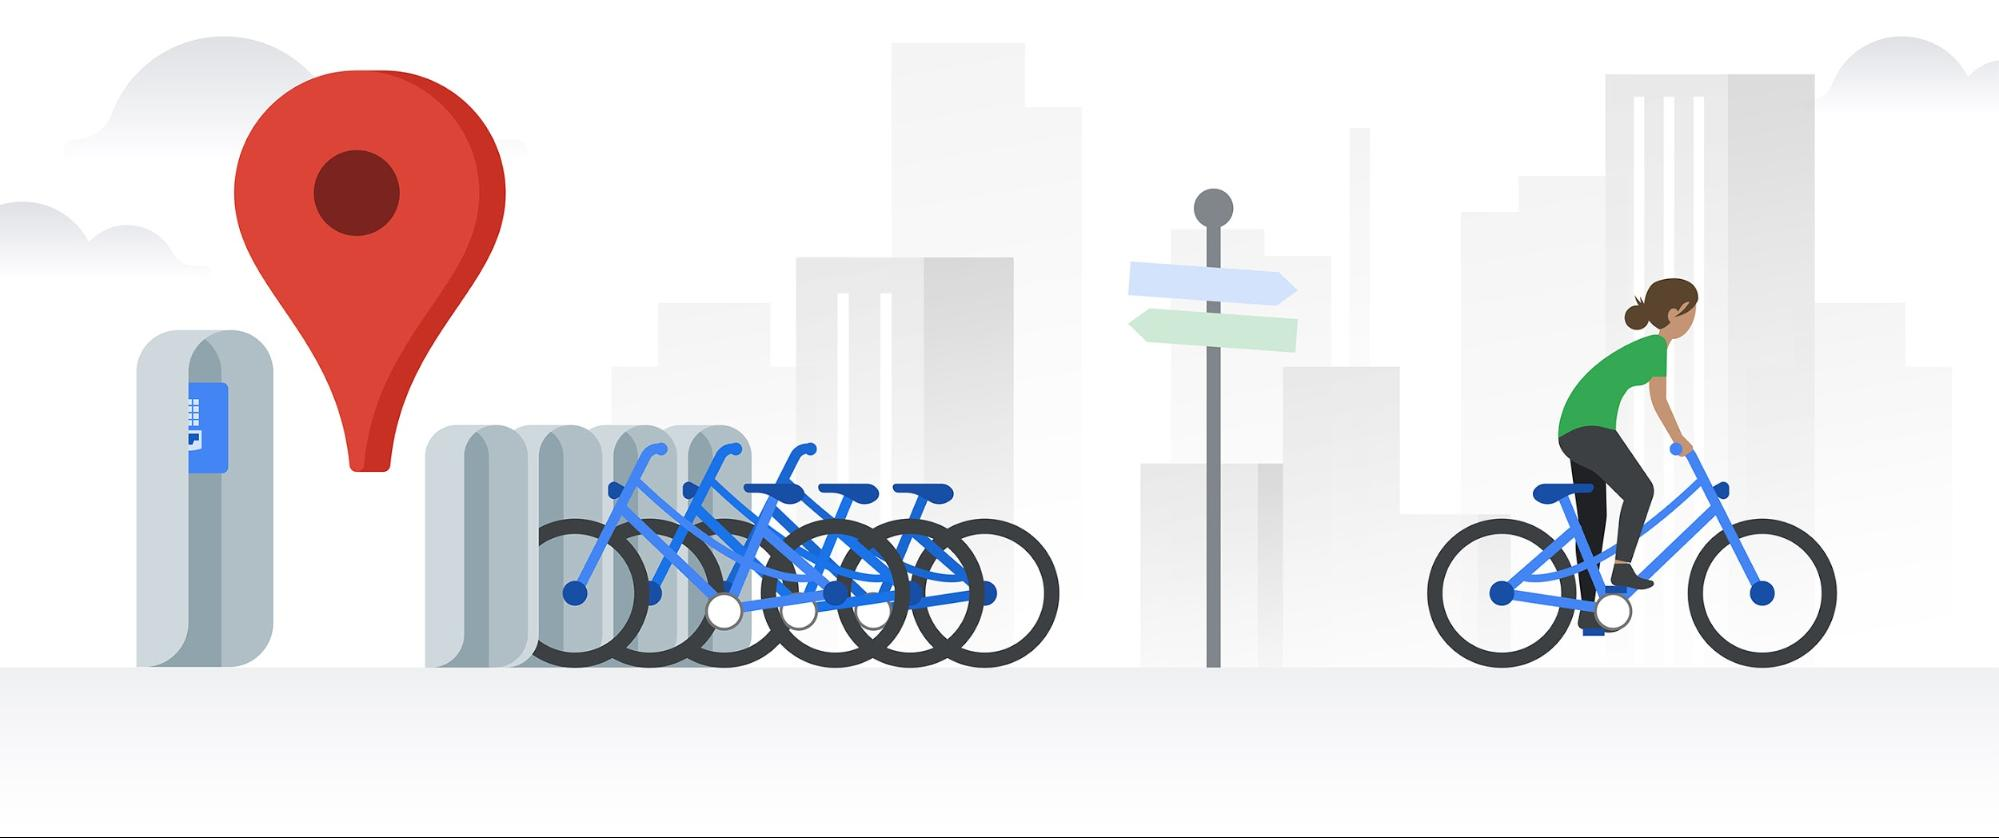

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [ ]:
#Import package
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from ast import literal_eval
## This will gather necessary libraries for plotting.
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from matplotlib import style 
import datetime as dt
style.use("ggplot")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [ ]:
#Import CSV file from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# It is time to grab the data
working_directory = '/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 2/Day 1/Copy of SeoulBikeData.csv'
df = pd.read_csv(working_directory,encoding = 'latin')

# Doing Basic Examination

1. There are 8760 rows and 14 columns in our dataset.
2.The dataset shows hourly rental data for one year (1 December 2017 to 31 November2018)(365 days).We are required to predict the total count of bikes rented during each hour.
3. There is high demand during day. This high demand might be due to office hours(i.e. 8am to 6pm) and there is low demand during 10:00 pm to 4:00 am.
4. With increase in Solar radiation demand for rented bike is increasing.
5. There is high demand for rented bikes on non holiday and low demand on holidays.



In [ ]:
## lets look at their shapes respectively.
print(" Shape of the resources dataframe is: " , df.shape)

 Shape of the resources dataframe is:  (8760, 14)


In [ ]:
# Lets look at he first 15 rows for dataframe to explore column names, indexes better.
df.head(24)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Lets look at he last 15 rows for dataframe to explore column names, indexes better.
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
#To get the data type of each column of a dataframe:

df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [ ]:
#To understands the statistics of columns that have numeric data types.

df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
len(df.Date.unique())

365

In [ ]:
df.Seasons.value_counts()

Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [ ]:
df.Holiday.value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

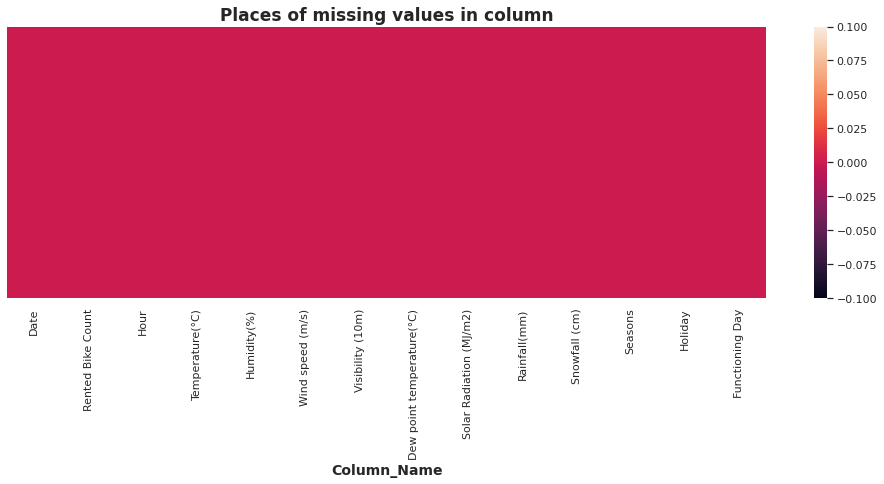

In [ ]:
# No missin Values in our dataset
plt.figure(figsize=(17, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

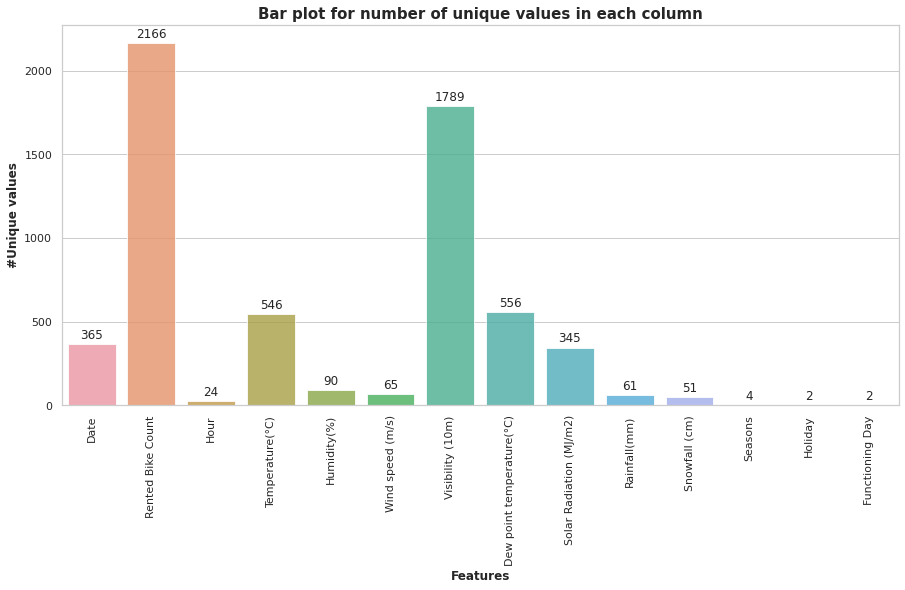

In [ ]:
# Unique Values in each column
unique_df = pd.DataFrame()
unique_df['Features'] = df.columns
unique=[]
for i in df.columns:
    unique.append(df[i].nunique())
unique_df['Uniques'] = unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


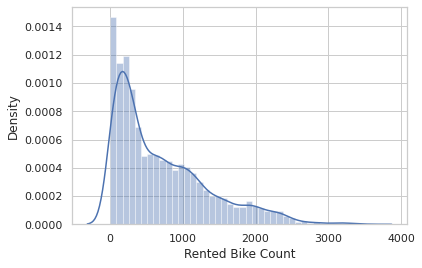

In [ ]:
import matplotlib as mpl
mpl.rc('font', size=15) # Set font size to 15
sns.distplot(df['Rented Bike Count']);


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f329ba20898>,
      dtype=object)

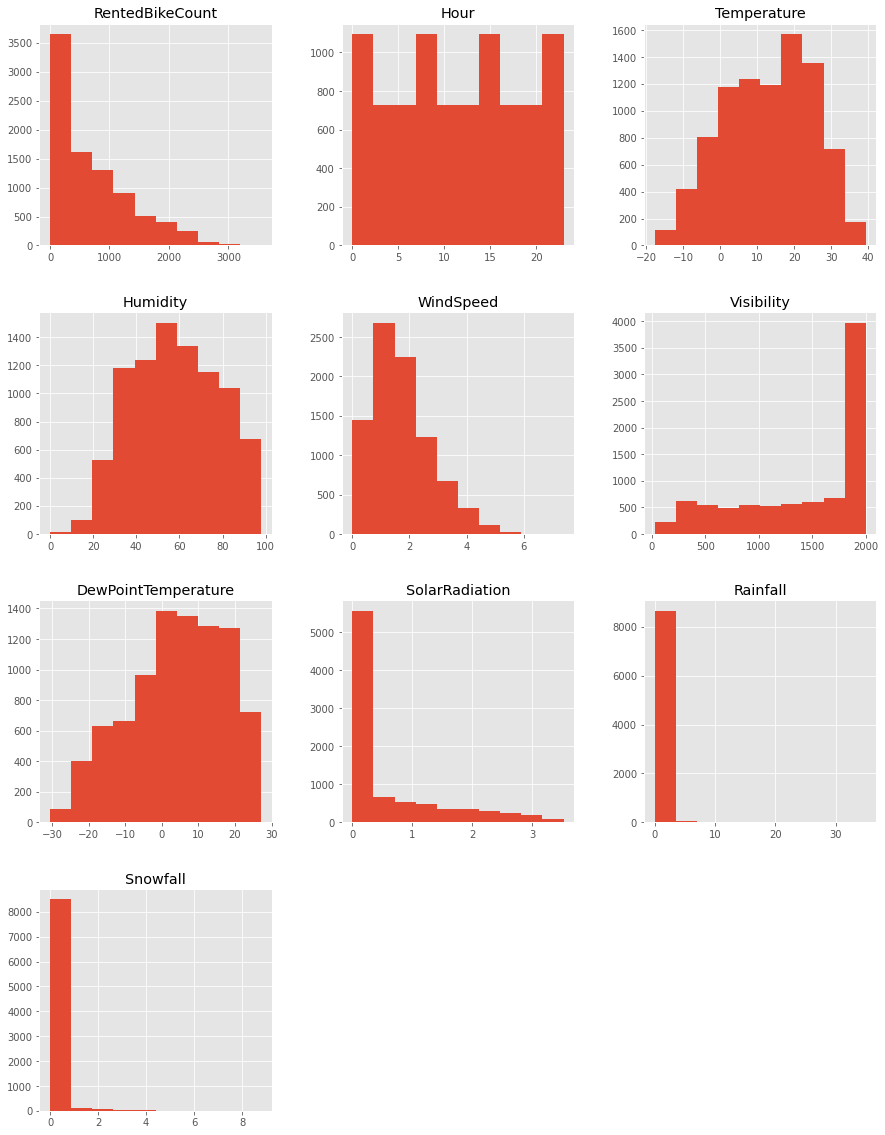

In [ ]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

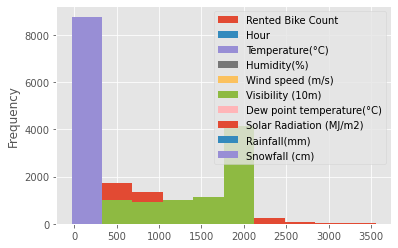

In [ ]:
df.plot.hist(by=None, bins=10)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


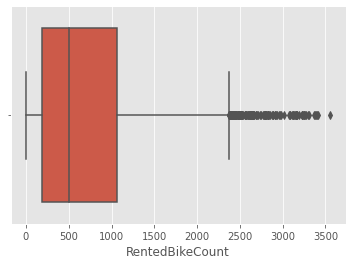

In [ ]:
sns.boxplot(df['RentedBikeCount'])

**Renaming our columns for easy accessibility**



In [ ]:
df.rename(columns={'Rented Bike Count': 'RentedBikeCount','Wind speed (m/s)':'WindSpeed','Visibility (10m)':'Visibility',
 'Dew point temperature(°C)': 'DewPointTemperature', 'Solar Radiation (MJ/m2)':'SolarRadiation','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall',
 'Functioning Day':'FunctioningDay','Temperature(°C)':'Temperature','Humidity(%)':'Humidity'}, inplace=True)

In [ ]:
df.head(1)

,Date,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

**One Hot Label Encoding**

In [ ]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['Holiday']= le.fit_transform(df['Holiday']) 
df['FunctioningDay']= le.fit_transform(df['FunctioningDay'])
df['Seasons']= le.fit_transform(df['Seasons'])

In [ ]:
df.head(1)

,Date,RentedBikeCount,Hour,Temperature,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1


In [ ]:
df['Seasons'].value_counts()

2    2208
1    2208
0    2184
3    2160
Name: Seasons, dtype: int64

In [ ]:
df['Holiday'].value_counts()

1    8328
0     432
Name: Holiday, dtype: int64

In [ ]:
df['FunctioningDay'].value_counts()

1    8465
0     295
Name: FunctioningDay, dtype: int64

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Date", y="RentedBikeCount", data=df)


ValueError: ignored

<Figure size 1440x720 with 0 Axes>

**Checking For Multicollinearity:**

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.

Temperature, Due point temperature and Humity are highly correlated to each other.

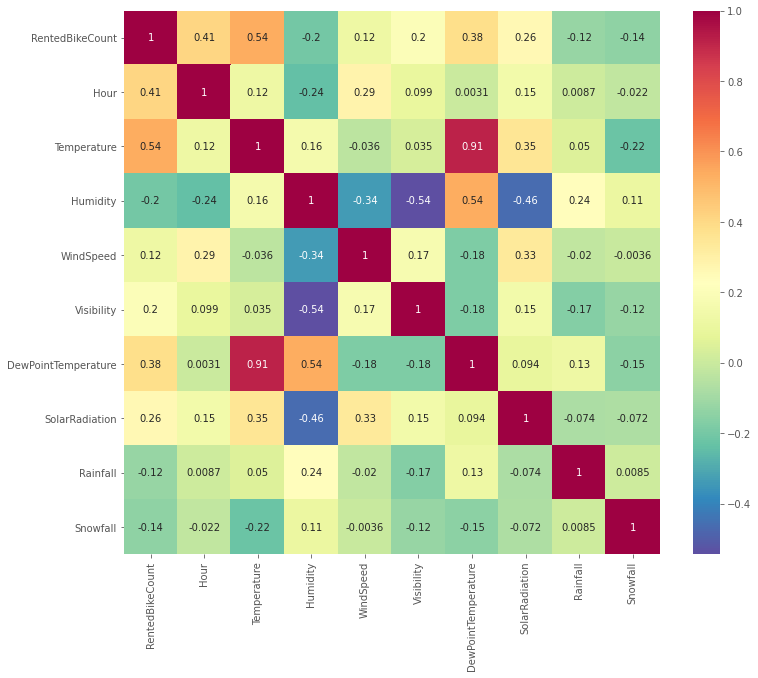

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot= True, cmap='Spectral_r')

VIF determines the strength of the correlation between the independent variables. It is predicted by taking a variable and regressing it against every other variable.

or

VIF score of an independent variable represents how well the variable is explained by other independent variables.

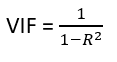

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 8760 non-null   datetime64[ns]
 1   RentedBikeCount      8760 non-null   int64         
 2   Hour                 8760 non-null   int64         
 3   Temperature          8760 non-null   float64       
 4   Humidity             8760 non-null   int64         
 5   WindSpeed            8760 non-null   float64       
 6   Visibility           8760 non-null   int64         
 7   DewPointTemperature  8760 non-null   float64       
 8   SolarRadiation       8760 non-null   float64       
 9   Rainfall             8760 non-null   float64       
 10  Snowfall             8760 non-null   float64       
 11  Seasons              8760 non-null   int64         
 12  Holiday              8760 non-null   int64         
 13  FunctioningDay       8760 non-nul

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df['Date'] = df['Date'].values.astype(float)

In [ ]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,Date,419.499732
1,RentedBikeCount,1.003616
2,Hour,0.999868
3,Temperature,1.005364
4,Humidity,1.002410
5,WindSpeed,0.998074
6,Visibility,1.003109
7,DewPointTemperature,1.001465
8,SolarRadiation,1.000702
9,Rainfall,1.000007


In [ ]:
df.drop(['Date'], axis = 1,inplace=True) 

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,RentedBikeCount,4.236172
1,Hour,5.061977
2,Temperature,43.778009
3,Humidity,15.263524
4,WindSpeed,4.848585
5,Visibility,9.140026
6,DewPointTemperature,23.144842
7,SolarRadiation,2.918672
8,Rainfall,1.105388
9,Snowfall,1.128549


In [ ]:
df.drop(['Temperature'], axis = 1,inplace=True) 

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,RentedBikeCount,3.984624
1,Hour,4.866753
2,Humidity,13.077266
3,WindSpeed,4.805818
4,Visibility,6.373789
5,DewPointTemperature,2.514901
6,SolarRadiation,2.087096
7,Rainfall,1.105183
8,Snowfall,1.118263
9,Seasons,3.150477


In [ ]:
df.head(1)

,RentedBikeCount,Hour,Humidity,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
0,254,0,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1


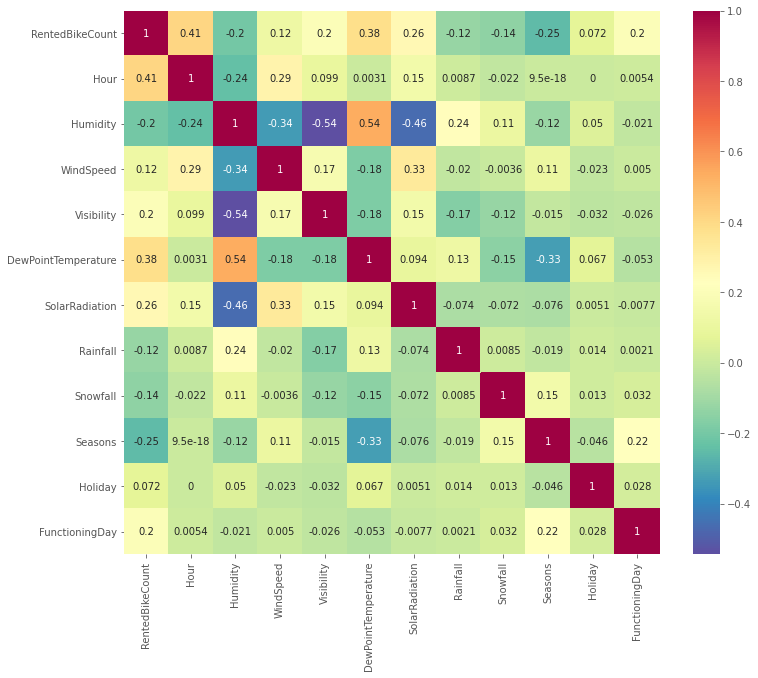

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot= True, cmap='Spectral_r')

In [ ]:
df.drop(['Humidity'], axis = 1,inplace=True) 

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,RentedBikeCount,3.753108
1,Hour,4.826967
2,WindSpeed,4.705428
3,Visibility,6.372967
4,DewPointTemperature,1.571181
5,SolarRadiation,1.731223
6,Rainfall,1.094009
7,Snowfall,1.087005
8,Seasons,3.015929
9,Holiday,8.186150


In [ ]:
df.head(1)

,RentedBikeCount,Hour,WindSpeed,Visibility,DewPointTemperature,SolarRadiation,Rainfall,Snowfall,Seasons,Holiday,FunctioningDay
0,254,0,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1


In [ ]:
df.drop(['FunctioningDay'], axis = 1,inplace=True) 
df.drop(['Holiday'], axis = 1,inplace=True) 

# Checking For Linearity

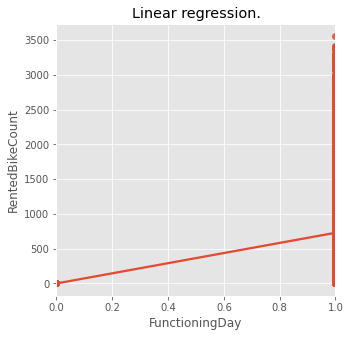

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('FunctioningDay')
plt.ylabel('RentedBikeCount')
sns.regplot(x=df['FunctioningDay'],y=df['RentedBikeCount'])

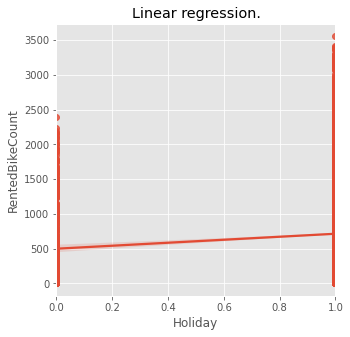

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Holiday')
plt.ylabel('RentedBikeCount')
sns.regplot(x=df['Holiday'],y=df['RentedBikeCount'])

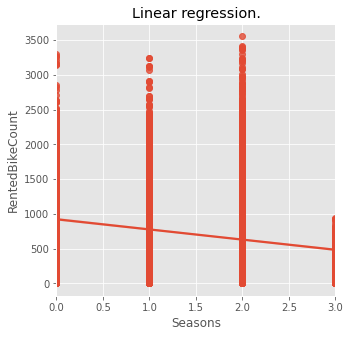

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Seasons')
plt.ylabel('RentedBikeCount')
sns.regplot(x=df['Seasons'],y=df['RentedBikeCount'])

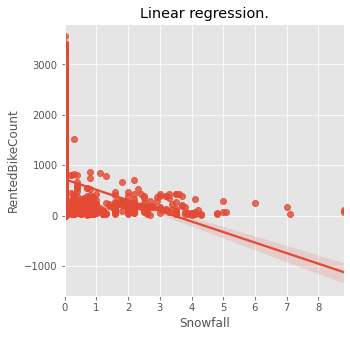

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Snowfall')
plt.ylabel('RentedBikeCount')
sns.regplot(x=df['Snowfall'],y=df['RentedBikeCount'])

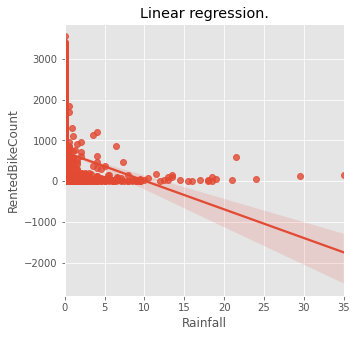

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Rainfall')
plt.ylabel('RentedBikeCount')
sns.regplot(x=df['Rainfall'],y=df['RentedBikeCount'])

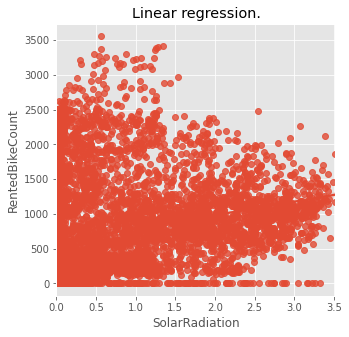

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('SolarRadiation	')
plt.ylabel('RentedBikeCount')
sns.regplot(x=df['SolarRadiation'],y=df['RentedBikeCount'])

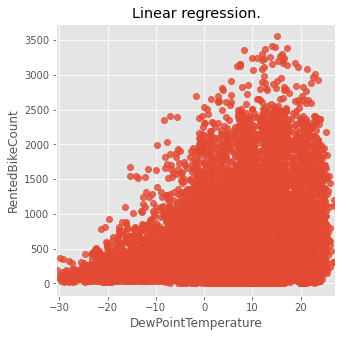

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('DewPointTemperature	')
plt.ylabel('RentedBikeCount')
sns.regplot(x=df['DewPointTemperature'],y=df['RentedBikeCount'])

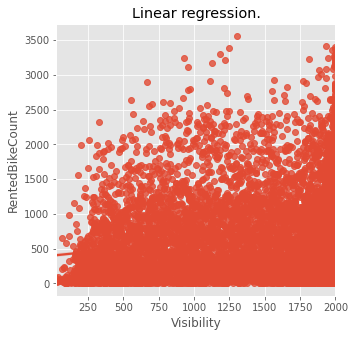

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Visibility')
plt.ylabel('RentedBikeCount')
sns.regplot(x=df['Visibility'],y=df['RentedBikeCount'])

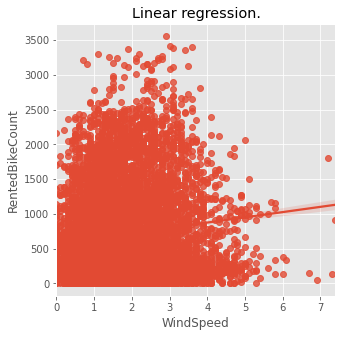

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('WindSpeed')
plt.ylabel('RentedBikeCount')
sns.regplot(x=df['WindSpeed'],y=df['RentedBikeCount'])

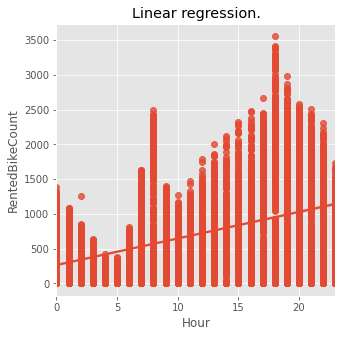

In [ ]:
plt.figure(figsize=(5,5))
plt.title('Linear regression.')
plt.xlabel('Hour')
plt.ylabel('RentedBikeCount')
sns.regplot(x=df['Hour'],y=df['RentedBikeCount'])

# Skewness of Data

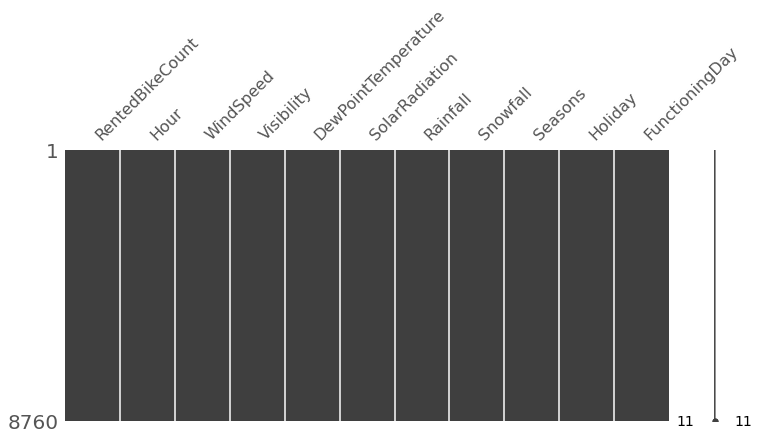

In [ ]:
import missingno as msno

msno.matrix(df,figsize=(12,5))


# taking help from assignment solution

In [ ]:
X = df[['Hour','WindSpeed','Visibility','DewPointTemperature','SolarRadiation','Rainfall','Snowfall','Seasons']]
y = df['RentedBikeCount']


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X.shape)
print(y.shape)


(8760, 8)
(8760,)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # transforms the existing features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model performance for the training set")
  print("-------------------------------------------")
  print("RMSE of training set is {}".format(rmse_train))
  print("R2 score of training set is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("RMSE of test set is {}".format(rmse_test))
  print("R2 score of test set is {}".format(r2_test))

In [ ]:
create_polynomial_regression_model(5)

The model performance for the training set
-------------------------------------------
RMSE of training set is 323.2958728330982
R2 score of training set is 0.7482914433353809


The model performance for the test set
-------------------------------------------
RMSE of test set is 2533.886528737193
R2 score of test set is -14.341061910726593


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.coef_

array([  781.48669888,   139.50929833,   385.52574291,  1081.34646064,
         298.34173802, -2654.76557344,  -420.02689405,  -199.15610451])

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
import math

In [ ]:
math.sqrt(mean_squared_error(y_test, y_pred))

506.3510536785941

In [ ]:
r2_score(y_test, y_pred)

0.38738936288170167

In [ ]:
# Validating Assumptions
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)


In [ ]:
#Residual = Actual value - Predicted value

residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

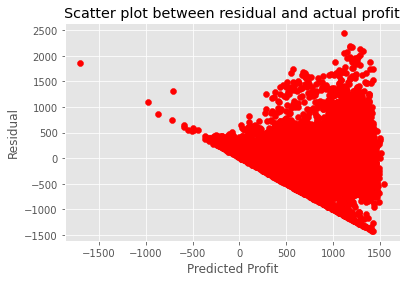

In [ ]:
#  Plotting scatter plot between residual and fitted values(Checking For heteroscedasticity)
plt.scatter(y_train_pred, residuals_train,c='red')
plt.title('Scatter plot between residual and actual profit')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual')
plt.show()

In [ ]:
#Let's check if the mean of residuals is almost zero:
round((np.mean(residuals_train)))

0

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [ ]:
print_metrics(y_train, y_train_pred)

MSE is 240432.42288731897
RMSE is 490.33908969948436
RMSE is 0.42098383131051365
MAE is 359.6856002105455
MAPE is inf


In [ ]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 256391.38956142234
RMSE is 506.351053678594
RMSE is 0.387389362881702
MAE is 371.7948180802058
MAPE is inf


In [ ]:
# Adjusted R2

def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

In [ ]:
adjusted_r2(len(y_train),len(X), y_train, y_train_pred)

3.314413173991575

In [ ]:
x = dataset.drop(["Profit"],axis=1)
y = dataset.Profit

In [ ]:
#Mean Of residuals must be zero
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))